In [18]:
import networkx as nx  

In [19]:
class Resources():
    def __init__(self,instances,allocations,requests,symbol):
        self.instances = instances
        self.allocations = allocations
        self.requests = requests
        self.symbol = symbol
        
class Process():
    def __init__(self,allocated,requested,symbol):
        self.allocated = allocated
        self.requested = requested
        self.symbol = symbol

class Graph():
    def __init__(self,Resources_array,Process_array):
        self.R = Resources_array
        self.P = Process_array
        self.graph = {}
   
    def add_Resourse(self,R):
        return self.R.append(R)
    
    def add_process(self,P):
        return self.P.append(P)
    
    @staticmethod
    def add_edge(Node1,Node2):
        sub_graph = [str(Node1), str(Node2)]
        return sub_graph
    
    def creategraphlist(self):
        graph = []
        for each_resource in self.R:
            for i in range(len(each_resource.allocations)):
                sub_graph_i = Graph.add_edge(each_resource.symbol,each_resource.allocations[i])
                graph.append(sub_graph_i)
                self.add_edge(each_resource.symbol,each_resource.allocations[i])
        
        for each_process in self.P:
            for i in range(len(each_process.requested)):
                sub_graph_i = Graph.add_edge(each_process.symbol,each_process.requested[i])
                graph.append(sub_graph_i)
                self.add_edge(each_process.symbol,each_process.requested[i])
            
        return graph
    
    def topologicalsort(self):
        list_ = self.R + self.P
        length = len(list_)
        stack = []
        visited = []
        Cycle_detected = False
        All_visited = False
        previous = None
        current = list_[0]
        
        while (Cycle_detected==False and All_visited==False):
             
            
            if current.symbol[0] == "R":
                
                next_ = eval(current.allocations[0])
                #print(next_)
                
                if (next_ not in visited) and (next_ not in stack):
                    visited.append(current)
                    #visited.append(next_)
                    if current in list_:
                        list_.remove(current)
                    else:
                        pass
                    #list_.remove(next_)
                    
                    previous = current
                    current = next_ 
                    #print(current.symbol)
                
                elif next_ in visited:
                    
                    visited.append(current)
                    print("Deadlock state, found a cycle")
                    Directions = []
                    [Directions.append(i) for i in visited if i not in Directions]
                    print("The cycle can be found in following sequence ", [i.symbol for i in Directions]) 
                    Cycle_detected = True
                    
                    
                
                elif next_ in stack:
                    stack.append(current)
                    #list_.remove(current)
                    visited.remove(current)
                    if len(visited) != 0:
                        current = visited[-1]
                    else:
                        current = list_[0]
                    #print(current.symbol)
            #print(current)
            
            elif current.symbol[0] == "P":

                nexts = current.requested

                if len(nexts) == 0:
                    stack.append(current)
                    list_.remove(current)
                    current = previous
                    #visited.remove(current) dont remove here
                    
                
                else:
                    next_ = eval(nexts[0])
                
                    if (next_ not in visited) and (next_ not in stack):
                        visited.append(current)
                        #visited.append(next_)
                        if current in list_:
                            list_.remove(current)
                        #list_.remove(next_)
                        else:
                            pass
                        
                        previous = current
                        current = next_ 
                        #print(current.symbol)
                        
                    elif next_ in visited:
                        
                        visited.append(current)
                        print("Deadlock state, found a cycle")
                        Directions = []
                        [Directions.append(i) for i in visited if i not in Directions]
                        print("The cycle can be found in following sequence ", [i.symbol for i in Directions]) 
                        Cycle_detected = True
                    
                    elif next_ in stack:
                        if len(nexts) > 1:

                        
                            #[print(i) for i in nexts]
                        
                            nexts.remove(next_.symbol)
                            next_ = nexts[0]
                        
                        else:
                            stack.append(current)
                            #list_.remove(current)
                            #visited.remove(current)
                            #print(current.symbol)
                        
            if length == len(stack): #or length == len(visited):
                
                All_visited = True

        if not Cycle_detected:
            Topological_order = stack[::-1]
            print("The topological order is ",[i.symbol for i in Topological_order])
            print("One of order of process completion is ", [i.symbol for i in stack])
            
                
        return stack         
        

![Getting Started](.\1.jpeg)
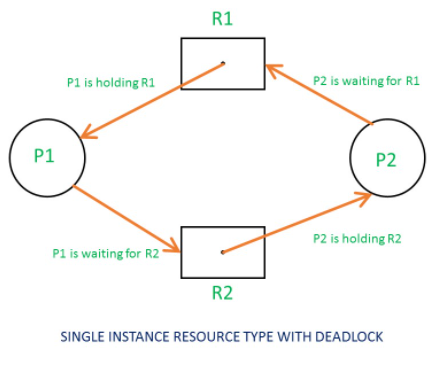

In [20]:
R1 = Resources(1,["P1"],["P2"],"R1")
R2 = Resources(1,["P2"],["P1"],"R2")
P1 = Process(["R1"],["R2"],"P1")
P2 = Process(["R2"],["R1"],"P2")
R = [R1,R2]
P = [P1,P2]

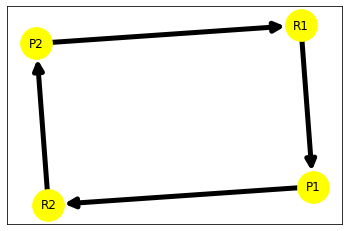

In [21]:
g1 = Graph(R,P)
G = nx.DiGraph(g1.creategraphlist())
options = {
    'node_color': 'yellow',
    'node_size': 1000,
    'width': 5,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}
nx.draw_networkx(G, arrows=True, **options)

In [22]:
G = g1.topologicalsort()

Deadlock state, found a cycle
The cycle can be found in following sequence  ['R1', 'P1', 'R2', 'P2']


![Getting Started](.\2.jpeg)
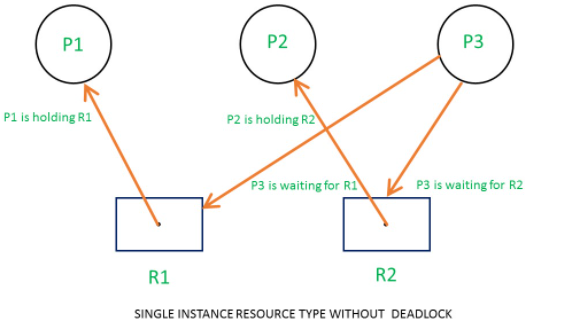

In [23]:
R1 = Resources(1,["P1"],["P3"],"R1")
R2 = Resources(1,["P2"],["P3"],"R2")
P1 = Process(["R1"],[],"P1")
P2 = Process(["R2"],[],"P2")
P3 = Process([],["R1","R2"],"P3")
R = [R1,R2]
P = [P1,P2,P3]

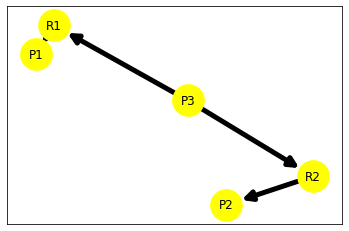

In [24]:
g2 = Graph(R,P)
G1 = nx.DiGraph(g2.creategraphlist())
options = {
    'node_color': 'yellow',
    'node_size': 1000,
    'width': 5,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}
nx.draw_networkx(G1, arrows=True, **options)

In [25]:
stack= g2.topologicalsort()

The topological order is  ['P3', 'R2', 'P2', 'R1', 'P1']
One of order of process completion is  ['P1', 'R1', 'P2', 'R2', 'P3']


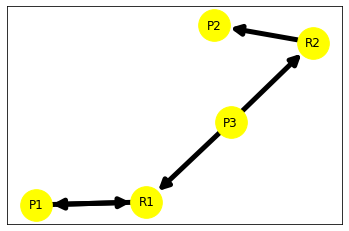

In [26]:
R1 = Resources(1,["P1"],["P3"],"R1")
R2 = Resources(1,["P2"],["P3"],"R2")
P1 = Process(["R1"],["R1"],"P1")
P2 = Process(["R2"],[],"P2")
P3 = Process([],["R1","R2"],"P3")
R = [R1,R2]
P = [P1,P2,P3]
g3 = Graph(R,P)
G2 = nx.DiGraph(g3.creategraphlist())
options = {
    'node_color': 'yellow',
    'node_size': 1000,
    'width': 5,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}
nx.draw_networkx(G2, arrows=True, **options)

In [27]:
stack = g3.topologicalsort()

Deadlock state, found a cycle
The cycle can be found in following sequence  ['R1', 'P1']


![Getting Started](.\6.jpg)
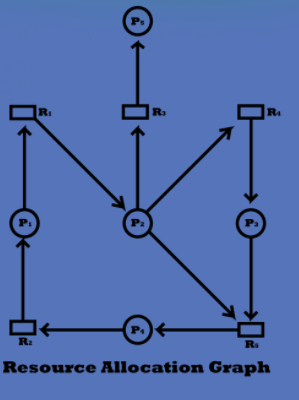

In [28]:
R1 = Resources(1,["P2"],["P1"],"R1")
R2 = Resources(1,["P1"],["P4"],"R2")
R3 = Resources(1,["P5"],["P2"],"R3")
R4 = Resources(1,["P3"],["P2"],"R4")
R5 = Resources(1,["P4"],["P2","P3"],"R5")
P1 = Process(["R2"],["R1"],"P1")
P2 = Process(["R1"],["R3","R4","R5"],"P2")
P3 = Process(["R4"],["R5"],"P3")
P4 = Process(["R5"],["R2"],"P4")
P5 = Process(["R3"],[],"P5")

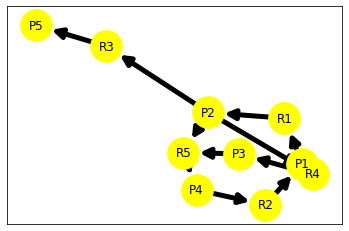

In [29]:
R = [R1,R2,R3,R4,R5]
P = [P1,P2,P3,P4,P5]
g4 = Graph(R,P)
G3 = nx.DiGraph(g4.creategraphlist())
options = {
    'node_color': 'yellow',
    'node_size': 1000,
    'width': 5,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}
nx.draw_networkx(G3, arrows=True, **options)

In [30]:
stack = g4.topologicalsort()

Deadlock state, found a cycle
The cycle can be found in following sequence  ['R1', 'P2', 'R4', 'P3', 'R5', 'P4', 'R2', 'P1']


![Getting Started](.\5.png)

In [31]:
R1 = Resources(1,["P2"],["P1"],"R1")
R2 = Resources(1,["P1"],["P3"],"R2")
R3 = Resources(1,["P2"],["P4"],"R3")
R4 = Resources(1,["P4"],["P2","P3"],"R4")

P1 = Process(["R2"],["R1"],"P1")
P2 = Process(["R1","R3"],["R4"],"P2")
P3 = Process([],["R2","R4"],"P3")
P4 = Process(["R4"],["R3"],"P4")


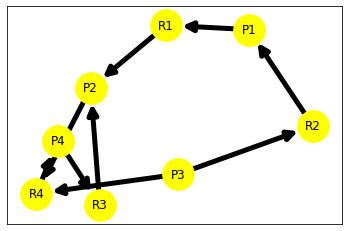

In [32]:
R = [R1,R2,R3,R4]
P = [P1,P2,P3,P4]
g5 = Graph(R,P)
G4 = nx.DiGraph(g5.creategraphlist())
options = {
    'node_color': 'yellow',
    'node_size': 1000,
    'width': 5,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}
nx.draw_networkx(G4, arrows=True, **options)

In [33]:
g4.topologicalsort()

Deadlock state, found a cycle
The cycle can be found in following sequence  ['R1', 'P2', 'R4', 'P4', 'R3']


[]

![Getting Started](.\4.jpg)

In [34]:
R0 = Resources(1,["P4"],["P0" , "P3"],"R0")
R1 = Resources(1,["P1"],["P2"],"R1")
R2 = Resources(1,["P2"],["P3"],"R2")
R3 = Resources(1,["P3"],["P1"],"R3")
R4 = Resources(1,["P2"],["P3"],"R4")
P0 = Process([],["R0"],"P1")
P1 = Process(["R1"],["R3","R4"],"P1")
P2 = Process(["R2"],["R1"],"P2")
P3 = Process(["R3"],["R0" , "R2"],"P3")
P4 = Process(["R0","R4"],[],"P4")
R = [R0,R1,R2,R3,R4]
P = [P0,P1,P2,P3,P4]
g = Graph(R,P)
stack = g.topologicalsort()

Deadlock state, found a cycle
The cycle can be found in following sequence  ['R1', 'P1', 'R3', 'P3', 'R2', 'P2']
